In [26]:
import numpy as np

#this is a subroutine/function for computing pairwise distances between the columns of X
def distmat(X, method='2norm'):
    n = X.shape[1]
    D = np.zeros((n, n))

    if method == '2norm':
        for i in range(n - 1):
            for j in range(i + 1, n):
                D[i, j] = np.linalg.norm(X[:, i] - X[:, j])
    elif method == 'angle':
        for i in range(n - 1):
            for j in range(i + 1, n):
                x = X[:, i]
                y = X[:, j]
                D[i, j] = np.arccos(np.dot(x.T, y) / (np.linalg.norm(x) * np.linalg.norm(y)))
                # Alternatively, use D(i,j) = min(j-i, n+i-j) * 2 * np.pi / 7
    else:
        print('Unknown distance method')
    
    D += D.T
    return D

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def mds3(HD, dim=None):
    A = -0.5 * np.square(HD)

    n = HD.shape[0]
    onevec = np.ones((n, 1))
    H = np.eye(n) - (onevec @ onevec.T) / n
    B = H @ A @ H


    l2, V0 = np.linalg.eigh(B)
    ii = np.argsort(l2)[::-1]#indices for sorting
    aa = l2[ii]#remember we want these evals largest to smallest
    ll = list(aa)
   # ll=aa#init this vector

    s = 0
    for i in range(len(aa)):
        ll[i] = aa[i]
        if aa[i] < 0:
            s += aa[i] ** 2
            ll[i] = 0
    mdserr2 = s

    i = 1
    while aa[i] > 0:
      i += 1
      posdim = i-1#this is the number of positive evals and the best embedding dimension 
    

    V = np.real(V0[:, ii])
    D = np.diag(ll)
    l3 = np.sqrt(np.abs(ll))
    VN = V @ np.diag(l3)
    LX = VN[:, :posdim].T

    #myerr = np.linalg.norm(B - LX.T @ LX, ord='fro') ** 2
    #LD = np.linalg.norm(LX[:, :, np.newaxis] - LX[:, np.newaxis, :], axis=0, ord=2)
    LD = distmat(LX, '2norm')#note the points are sitting a posdim-dimension space
    
    
    configerr = np.zeros(7)
    for i in range(7):
        Bhati = LX[:i+1,:].T @ LX[:i+1,:]
        configerr[i] = np.linalg.norm(B - Bhati, ord='fro') ** 2

    return LX, LD, aa, configerr, posdim

In [45]:
import numpy as np
from scipy.spatial.distance import squareform
import scipy

from scipy.io import loadmat

# Load MATLAB file
mat_data = loadmat('MorseData.mat')
#data "points" 0-9 (only have "distances" between points)
#    {'1'}    {'.----'}
#    {'2'}    {'..---'}
#    {'3'}    {'...--'}
#    {'4'}    {'....-'}
#    {'5'}    {'.....'}
#    {'6'}    {'-....'}
#    {'7'}    {'--...'}
#    {'8'}    {'---..'}
#    {'9'}    {'----.'}
#    {'0'}    {'-----'}

# Access variables from MATLAB file
dissMatrix = mat_data['dissMatrix']
print(dissMatrix.shape)

dissMatrixF = dissMatrix.astype(float)

# Load data
#dissMatrix = np.loadtxt('morse.txt')
HD = dissMatrixF[-10:, -10:] #alphabet in entries included in dataset
print(HD)



(36, 36)
[[  0.  48. 139. 160. 150. 149. 128.  99.  61.  73.]
 [ 48.   0.  57. 132. 164. 149. 125. 128. 125. 146.]
 [139.  57.   0. 100. 123. 107. 137. 142. 160. 161.]
 [160. 132. 100.   0.  68. 109. 127. 152. 165. 169.]
 [150. 164. 123.  68.   0. 119. 139. 160. 171. 174.]
 [149. 149. 107. 109. 119.   0.  43. 133. 163. 146.]
 [128. 125. 137. 127. 139.  43.   0.  44. 114. 149.]
 [ 99. 128. 142. 152. 160. 133.  44.   0.  63. 105.]
 [ 61. 125. 160. 165. 171. 163. 114.  63.   0.  26.]
 [ 73. 146. 161. 169. 174. 146. 149. 105.  26.   0.]]


In [46]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
#from mds_function import mds  # Assuming the MDS function is saved in a separate file called mds_function.py

# Load the data from "morse" file
# Assuming dissimilarities is already defined or loaded
# dissimilarities = ...

# Create the distance matrix
#HD = dissimilarities[:26, :26]

dim = 10
#LX, LD, mdserr = mds2_function(HD, dim)
LX, LD, evals, configerr, posdim = mds3(HD, dim)

print(evals)
print("LX",LX)
print("LD",LD)

1
2
3
4
5
6
[ 3.76398094e+04  1.88348578e+04  1.35401806e+04  6.86746414e+03
  4.33106297e+03  2.00526468e+03  6.89091047e-13 -7.70309107e+02
 -3.41204493e+03 -4.71008560e+03]
LX [[-59.64253356  -8.58656198  53.59890537  81.33085243  79.80997035
   53.61695257   7.88896812 -46.67043101 -83.85416148 -77.49196082]
 [ 37.46606714  79.04970136  56.82901509   4.72951768  -9.93151963
  -49.01635046 -60.40012698 -40.07265612 -10.09525224  -8.55839585]
 [ 10.74605495 -40.54405988 -26.05696279  30.39499804  62.34112916
  -25.70611709 -50.60983379 -25.7334465   20.67141699  44.49682091]
 [ -4.47696028  -9.38245989  20.13942253 -15.77744918 -22.13772946
   48.25929707 -15.73136096 -32.00952329 -12.09677667  43.21354011]
 [ 38.52734082   8.4731048  -24.17998529 -25.3254342   22.04514208
   15.43113445  10.59434262 -18.49661562 -14.95312351 -12.11590615]
 [  3.277913    10.00275085 -21.68800285  27.68609088 -18.03724226
    3.43775287   7.0425182  -16.09977838   3.19702563   1.18097206]]
LD [[  0. 

In [60]:
print(evals)
print(LX)

[ 3.76398094e+04  1.88348578e+04  1.35401806e+04  6.86746414e+03
  4.33106297e+03  2.00526468e+03  6.89091047e-13 -7.70309107e+02
 -3.41204493e+03 -4.71008560e+03]
[[-59.64253356  -8.58656198  53.59890537  81.33085243  79.80997035
   53.61695257   7.88896812 -46.67043101 -83.85416148 -77.49196082]
 [ 37.46606714  79.04970136  56.82901509   4.72951768  -9.93151963
  -49.01635046 -60.40012698 -40.07265612 -10.09525224  -8.55839585]
 [ 10.74605495 -40.54405988 -26.05696279  30.39499804  62.34112916
  -25.70611709 -50.60983379 -25.7334465   20.67141699  44.49682091]
 [ -4.47696028  -9.38245989  20.13942253 -15.77744918 -22.13772946
   48.25929707 -15.73136096 -32.00952329 -12.09677667  43.21354011]
 [ 38.52734082   8.4731048  -24.17998529 -25.3254342   22.04514208
   15.43113445  10.59434262 -18.49661562 -14.95312351 -12.11590615]
 [  3.277913    10.00275085 -21.68800285  27.68609088 -18.03724226
    3.43775287   7.0425182  -16.09977838   3.19702563   1.18097206]]


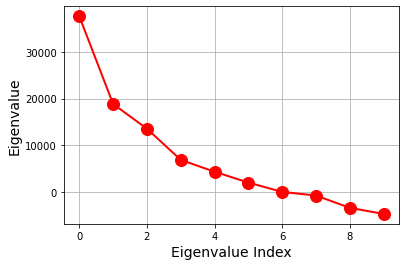

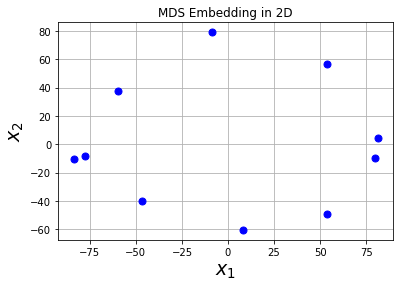

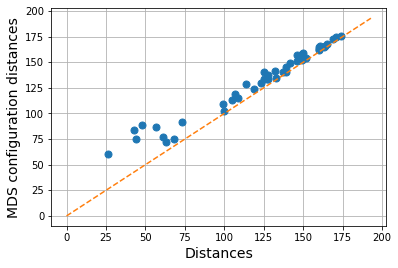

[531.07487325 262.04715778 128.96352676 122.93337745 127.62772347
 133.83285518 133.83285518 133.83285518 133.83285518 133.83285518]


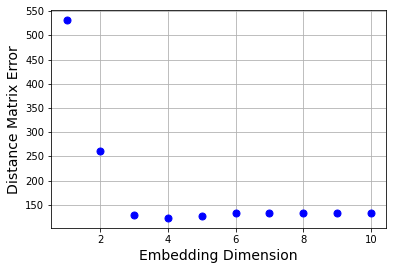

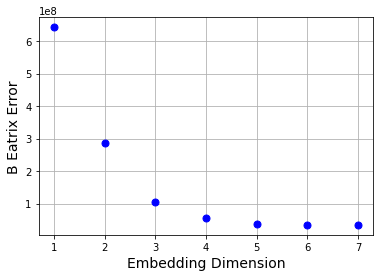

In [57]:

# Plot the MDS embedding
plt.figure()
plt.plot(evals, 'r-o', markersize=12, linewidth=2)
plt.xlabel('Eigenvalue Index', fontsize=14)
plt.ylabel('Eigenvalue', fontsize=14)
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
plt.grid(True)


plt.figure()
plt.plot(LX[0], LX[1], 'b.', markersize=14)
plt.xlabel('${x}_1$', fontsize=19)
plt.ylabel('${x}_2$', fontsize=19)
plt.title('MDS Embedding in 2D')
plt.grid(True)
plt.show()

# Plot distances vs MDS configuration distances
a1 = []
a2 = []
for i in range(HD.shape[1]):
    for j in range(i + 1, HD.shape[1]):
        a1.append(HD[i, j])
        a2.append(LD[i, j])

plt.figure()
plt.plot(a1, a2, '.', markersize=14)

xx = 1.1*np.max(LD)
plt.plot(np.arange(xx), np.arange(xx), '--')
plt.xlabel('Distances', fontsize=14)
plt.ylabel('MDS configuration distances', fontsize=14)
plt.grid(True)
plt.show()

# Compute and plot distance matrix error for different embedding dimensions
derr = np.zeros(dim)
for i in range(dim):
    #Di = np.linalg.norm(LX[:, :i+1][:, :, np.newaxis] - LX[:, :i+1][:, np.newaxis, :], axis=0)
    Di = distmat(LX[:i+1,:], '2norm')

    derr[i] = np.linalg.norm(HD - Di, 'fro')
print(derr)

plt.figure()
plt.plot(np.arange(1, dim + 1), derr, 'b.', markersize=14)
plt.xlabel('Embedding Dimension', fontsize=14)
plt.ylabel('Distance Matrix Error', fontsize=14)
plt.grid(True)
plt.show()


plt.figure()
plt.plot(np.arange(1, len(configerr)+1), configerr, 'b.', markersize=14)
plt.xlabel('Embedding Dimension', fontsize=14)
plt.ylabel('B Eatrix Error', fontsize=14)
plt.grid(True)
plt.show()


In [58]:
print(len(configerr))

7


In [59]:
print(HD)

[[  0.  48. 139. 160. 150. 149. 128.  99.  61.  73.]
 [ 48.   0.  57. 132. 164. 149. 125. 128. 125. 146.]
 [139.  57.   0. 100. 123. 107. 137. 142. 160. 161.]
 [160. 132. 100.   0.  68. 109. 127. 152. 165. 169.]
 [150. 164. 123.  68.   0. 119. 139. 160. 171. 174.]
 [149. 149. 107. 109. 119.   0.  43. 133. 163. 146.]
 [128. 125. 137. 127. 139.  43.   0.  44. 114. 149.]
 [ 99. 128. 142. 152. 160. 133.  44.   0.  63. 105.]
 [ 61. 125. 160. 165. 171. 163. 114.  63.   0.  26.]
 [ 73. 146. 161. 169. 174. 146. 149. 105.  26.   0.]]


In [51]:
print(np.max(LD))

175.70232714977695


In [42]:
print(LD)

[[  0.          89.10180257 140.40826672 161.65362744 159.35333459
  157.95649317 137.20031679 109.07131443  76.58343848  91.75776208]
 [ 89.10180257   0.          86.67604591 141.90461125 165.68073228
  154.61061062 140.97016951 133.34377844 134.02179852 151.40394466]
 [140.40826672  86.67604591   0.         101.97733698 129.98330515
  119.140407   140.55718914 149.08728939 165.2250489  166.25014894]
 [161.65362744 141.90461125 101.97733698   0.          74.91903795
  114.69000986 133.84227041 154.1728931  168.28920687 173.08109612]
 [159.35333459 165.68073228 129.98330515  74.91903795   0.
  124.20417711 145.87250485 162.50461873 174.4790139  175.70232715]
 [157.95649317 154.61061062 119.140407   114.69000986 124.20417711
    0.          83.49866608 134.58618278 164.71232945 156.66600759]
 [137.20031679 140.97016951 140.55718914 133.84227041 145.87250485
   83.49866608   0.          75.20370377 129.26356797 151.81356449]
 [109.07131443 133.34377844 149.08728939 154.1728931  162.50461

In [43]:
print(LD)

[[  0.          89.10180257 140.40826672 161.65362744 159.35333459
  157.95649317 137.20031679 109.07131443  76.58343848  91.75776208]
 [ 89.10180257   0.          86.67604591 141.90461125 165.68073228
  154.61061062 140.97016951 133.34377844 134.02179852 151.40394466]
 [140.40826672  86.67604591   0.         101.97733698 129.98330515
  119.140407   140.55718914 149.08728939 165.2250489  166.25014894]
 [161.65362744 141.90461125 101.97733698   0.          74.91903795
  114.69000986 133.84227041 154.1728931  168.28920687 173.08109612]
 [159.35333459 165.68073228 129.98330515  74.91903795   0.
  124.20417711 145.87250485 162.50461873 174.4790139  175.70232715]
 [157.95649317 154.61061062 119.140407   114.69000986 124.20417711
    0.          83.49866608 134.58618278 164.71232945 156.66600759]
 [137.20031679 140.97016951 140.55718914 133.84227041 145.87250485
   83.49866608   0.          75.20370377 129.26356797 151.81356449]
 [109.07131443 133.34377844 149.08728939 154.1728931  162.50461